## Decision Tree for Employee Retention Prediction ( target value "LeaveOrNot") data set

In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt

In [163]:
df = pd.read_csv('data/Employee.csv')
df.head()

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1

In [164]:
# Convert categorical variables to numeric
#df_encoded = df.copy()
#df_encoded['Education'] = pd.Categorical(df_encoded['Education']).codes
#df_encoded['City'] = pd.Categorical(df_encoded['City']).codes
#df_encoded['Gender'] = pd.Categorical(df_encoded['Gender']).codes
#df_encoded['EverBenched'] = pd.Categorical(df_encoded['EverBenched']).codes


In [165]:
#define variables for column indexes
Education = 0
JoiningYear = 1
City = 2
PaymentTier = 3
Age = 4
Gender = 5
EverBenched = 6
ExperienceInCurrentDomain = 7
LeaveOrNot = 8

#### Explore the Data

In [166]:
print(df.shape)

(4653, 9)


In [167]:
df.LeaveOrNot.value_counts()

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

In [168]:
df.describe()

JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4653.000000  4653.000000  4653.000000                4653.000000   
mean   2015.062970     2.698259    29.393295                   2.905652   
std       1.863377     0.561435     4.826087                   1.558240   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     3.000000    26.000000                   2.000000   
50%    2015.000000     3.000000    28.000000                   3.000000   
75%    2017.000000     3.000000    32.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  4653.000000  
mean      0.343864  
std       0.475047  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

** Features are of different sizes.ExperienceInCurrentDomain &  LeaveOrNot have smallest value of 0 which is acceptable for this features. Therefore count says no missing data.**

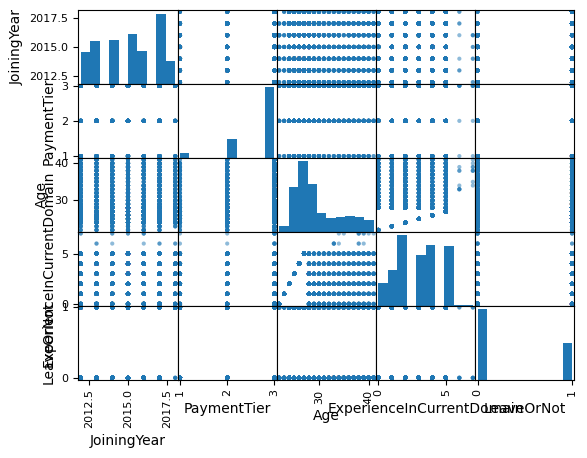

In [169]:
scatter_matrix(df)
plt.savefig('plots/employess.png')
#plt.plot()

** Looks like the grouping is obvious and corresponds to different features. It seems to split with gaps and lines. Separating employees who leave and stays should be easy. PaymentTier & ExperienceInCurrentDomain looks to be promising features.**

In [170]:
# LeaveOrNot of employees based on JoiningYear
# d[d[:,JoiningYear] == "2018", LeaveOrNot] is a row selector and selects all "2018" history type rows.
d = np.array(df)
print(d[d[:,JoiningYear] == 2018, LeaveOrNot])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**This shows that employees who joined 2018 tend to leave the workplace. Expect a very good model** 

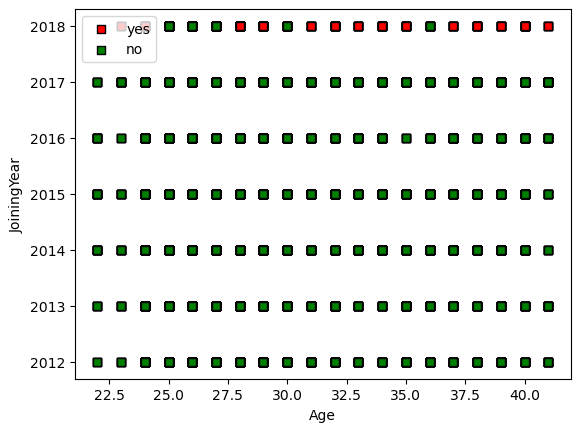

In [171]:
# age and ammount for each default?
d = np.array(df)
# d = df.to_numpy()
plt.scatter(
 d[d[:,LeaveOrNot] == 1, Age],
 d[d[:,LeaveOrNot] == 1, JoiningYear],
 c='red', marker='s', edgecolor='black',
 label='yes'
)
plt.scatter(
 d[d[:,LeaveOrNot] == 0, Age],
 d[d[:,LeaveOrNot] == 0, JoiningYear],
 c='green', marker='s', edgecolor='black',
 label='no'
)
plt.xlabel('Age')
plt.ylabel('JoiningYear')
plt.legend(loc="upper left")
plt.show()

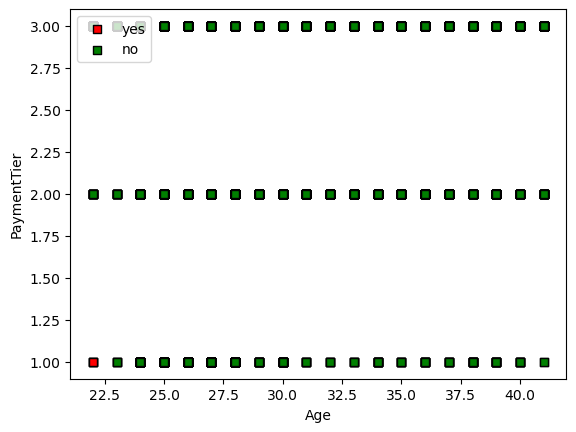

In [172]:
# age and ammount for each default?
d = np.array(df)
# d = df.to_numpy()
plt.scatter(
 d[d[:,LeaveOrNot] == 1, Age],
 d[d[:,LeaveOrNot] == 1, PaymentTier],
 c='red', marker='s', edgecolor='black',
 label='yes'
)
plt.scatter(
 d[d[:,LeaveOrNot] == 0, Age],
 d[d[:,LeaveOrNot] == 0, PaymentTier],
 c='green', marker='s', edgecolor='black',
 label='no'
)
plt.xlabel('Age')
plt.ylabel('PaymentTier')
plt.legend(loc="upper left")
plt.show()

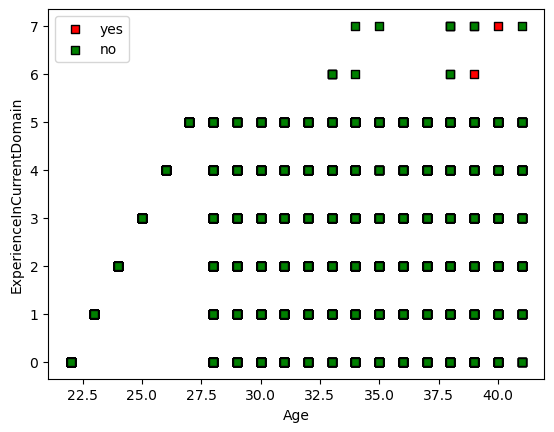

In [173]:
# age and ammount for each default?
d = np.array(df)
# d = df.to_numpy()
plt.scatter(
 d[d[:,LeaveOrNot] == 1, Age],
 d[d[:,LeaveOrNot] == 1, ExperienceInCurrentDomain],
 c='red', marker='s', edgecolor='black',
 label='yes'
)
plt.scatter(
 d[d[:,LeaveOrNot] == 0, Age],
 d[d[:,LeaveOrNot] == 0, ExperienceInCurrentDomain],
 c='green', marker='s', edgecolor='black',
 label='no'
)
plt.xlabel('Age')
plt.ylabel('ExperienceInCurrentDomain')
plt.legend(loc="upper left")
plt.show()

#### Build the Model

In [174]:
# Encode categorical data
df_encoded = pd.get_dummies(df, drop_first=True)
# Separate features and target
X = df_encoded.drop(columns='LeaveOrNot')  # Adjust based on your actual target column name
y = df_encoded['LeaveOrNot']

In [175]:
# 125 training and 25 test
# stratify ensures the same proportions of species in traing and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=1, stratify=y)

In [176]:
#model = DecisionTreeClassifier(max_depth=2)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print(model.get_depth())

23


#### Evaluation

In [177]:
print("[training accuracy: ", model.score(X_train, y_train), "]")
print("test accuracy: ", model.score(X_test, y_test))

[training accuracy:  0.9315630988228853 ]
test accuracy:  0.827


**testing accuracy is the important one**

In [178]:
#Predict the response for test dataset
y_hat = model.predict(X_test)
print("test accuracy:", accuracy_score(y_test, y_hat))

test accuracy: 0.827


In [179]:
# confusion matrix
cm = confusion_matrix(y_test, y_hat)
print(cm)

[[593  63]
 [110 234]]


In [180]:
#### Draw the tree

In [181]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

In [182]:
df_encoded.head()

JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  LeaveOrNot  \
0         2017            3   34                          0           0   
1         2013            1   28                          3           1   
2         2014            3   38                          2           0   
3         2016            3   27                          5           1   
4         2017            3   24                          2           1   

   Education_Masters  Education_PHD  City_New Delhi  City_Pune  Gender_Male  \
0              False          False           False      False         True   
1              False          False           False       True        False   
2              False          False            True      False        False   
3               True          False           False      False         True   
4               True          False           False       True         True   

   EverBenched_Yes  
0            False  
1            False  
2            False  
3            False  
4             True

In [183]:
# Select only the relevant features
feature_names = [
    'JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain',
    'Education_Masters', 'Education_PHD',
    'City_New Delhi', 'City_Pune', 'Gender_Male','EverBenched_Yes']


target_names = ["yes", "no"]

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
 filled=True, rounded=True,
 special_characters=True, feature_names = feature_names,
 class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('plots/employee_long_figure.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.756761 to fit



In [184]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
# Method 1: Simple and Clean Visualization
def plot_simple_tree(model, feature_names, class_names):
    plt.figure(figsize=(15,7))  # Smaller figure size
    plot_tree(model, 
             feature_names=feature_names,
             class_names=class_names,
             filled=True,
             rounded=True,
             fontsize=10,
             max_depth=3,  # Limit depth for visibility
             proportion=True,
             precision=2)
    plt.show()

In [191]:
# Create and fit model
model = DecisionTreeClassifier(max_depth=2)  # Limiting depth for better visualization
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [186]:
class_names = ['Stay', 'Leave']

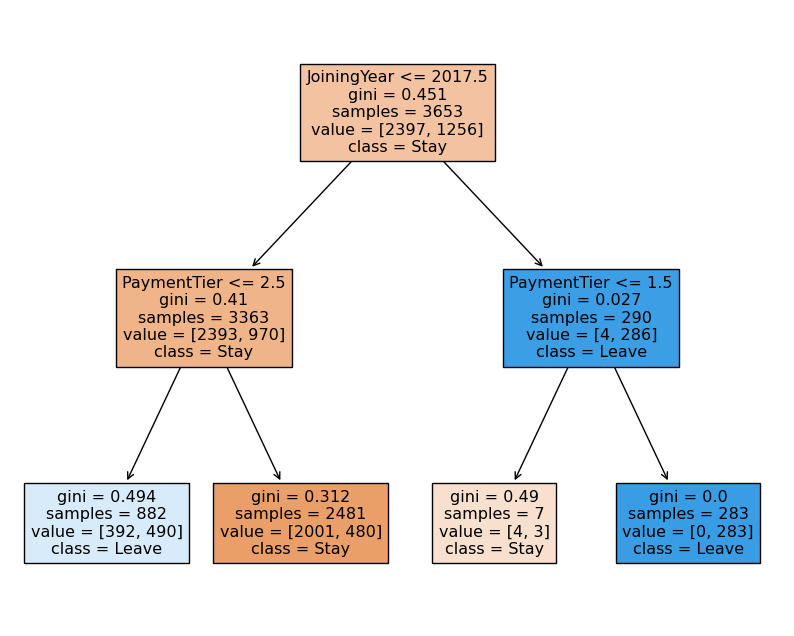

In [192]:
#plot_simple_tree(model, feature_names, class_names)
# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
# Save the plot as a PNG file
#plt.savefig('plots/employee_short_figure.png') 
plt.show()